In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.16f}'.format

In [295]:
clicks = pd.read_csv('/home/facundo/Escritorio/datos2019local/data/clicks.csv')

In [296]:
coordenadas = clicks.loc[:,['latitude', 'longitude']]
coordenadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 2 columns):
latitude     26351 non-null float64
longitude    26351 non-null float64
dtypes: float64(2)
memory usage: 411.8 KB


In [297]:
coordenadas.head()

,latitude,longitude
0,1.2056887519199482,1.0702342714774236
1,1.2189237334319261,1.0712090638488148
2,1.2056887519199482,1.0702342714774236
3,1.2056887519199482,1.0702342714774236
4,1.2056887519199482,1.0702342714774236


In [298]:
(coordenadas['latitude'] == coordenadas['longitude']).value_counts()

False    26351
dtype: int64

No hay ninguna latitud que tenga el mismo hash que una longitud. Entonces se tomará una tercera coordenada que se llamará 'punto' y resultará de la suma de 'latitud' + 'longitud', para luego hacer un value_counts() y determinar cuántos clicks se realizaron desde una misma posición.

In [305]:
coordenadas['punto'] = coordenadas['latitude'] + coordenadas['longitude']
top = coordenadas.groupby('punto').count().sort_values(ascending=False, by='latitude').head(10)['latitude'].reset_index()
top

,punto,latitude
0,2.2759230233973717,22949
1,2.2901327972807408,1105
2,2.2991429227626834,281
3,2.2826314876863787,250
4,2.2776833447550295,186
5,2.2823900257028971,171
6,2.2832941839004537,100
7,2.2765502501467623,90
8,2.2750451505734146,85
9,2.2765195722529232,83


In [379]:
top10 = coordenadas[coordenadas['punto'] == 2.2759230233973717].drop_duplicates()
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2901327972807408].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2991429227626834].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2826314876863787].drop_duplicates())
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2776833447550295].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2823900257028971].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2832941839004537].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2765502501467623].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2750451505734146].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2765195722529232].drop_duplicates()) 
top10 = top10.reset_index()
del top10['index']
top10['cantidad'] = top['latitude']

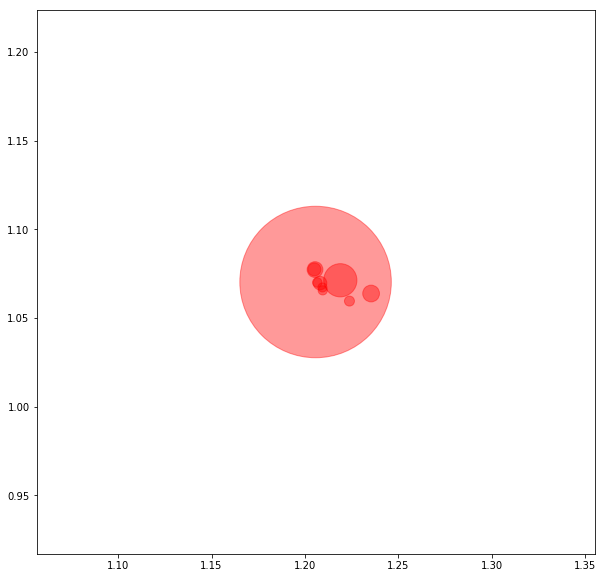

In [380]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
plt.scatter(top10.latitude, top10.longitude, s=top10.cantidad, c="red", alpha=0.4)
plt.show()

El área de cada burbuja representa la cantidad de veces que se registró un click desde un mismo punto. Como los puntos están muy cerca y hay un punto que concentra la gran mayoría de los clicks, éste engloba a todos los demás. Es por ello, que para que se note la diferencia de área (de cantidad de clicks) se decide por separar las burbujas, moviendolas sobre el eje x.

In [377]:
top10 = coordenadas[coordenadas['punto'] == 2.2759230233973717].drop_duplicates()
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2901327972807408].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2991429227626834].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2826314876863787].drop_duplicates())
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2776833447550295].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2823900257028971].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2832941839004537].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2765502501467623].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2750451505734146].drop_duplicates()) 
top10 = top10.append(coordenadas[coordenadas['punto'] == 2.2765195722529232].drop_duplicates()) 
top10 = top10.reset_index()
del top10['index']
top10['cantidad'] = top['latitude']
top10.loc[0, 'latitude'] = top10.loc[0, 'latitude'] - 0.90
top10.loc[1, 'latitude'] = top10.loc[1, 'latitude'] - 0.70
top10.loc[2, 'latitude'] = top10.loc[2, 'latitude'] - 0.60
top10.loc[3, 'latitude'] = top10.loc[3, 'latitude'] - 0.50
top10.loc[4, 'latitude'] = top10.loc[4, 'latitude'] - 0.40
top10.loc[5, 'latitude'] = top10.loc[5, 'latitude'] - 0.30
top10.loc[6, 'latitude'] = top10.loc[6, 'latitude'] - 0.20
top10.loc[7, 'latitude'] = top10.loc[7, 'latitude'] - 0.10
top10.loc[8, 'latitude'] = top10.loc[8, 'latitude'] - 0.05

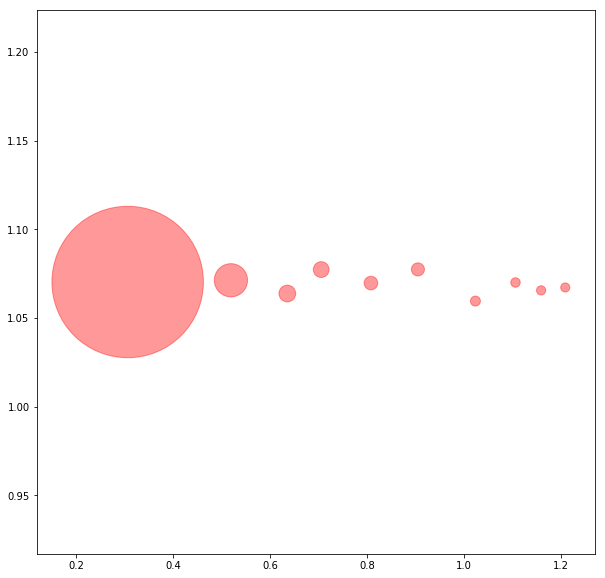

In [378]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
plt.scatter(top10.latitude, top10.longitude, s=top10.cantidad, c="red", alpha=0.4)
plt.show()

Luego de la transformación aplicada, resulta el siguiente gráfico en el que se puede ver claramente que hay una burbuja que supera ampliamente a las demás en área. Se supone al igual que en el gráfico "Top de las 10 ciudades con más eventos", que ésta sería la capital.